### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.4.0'

In [3]:
df1 = pd.read_csv('./data/IBM_Employees.csv')
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2,Life Sciences,1,2,...,11,3,1,8,0,1.0,6,4,0,5
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1,Life Sciences,2,3,...,23,4,4,10,3,3.0,10,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2,Other,4,4,...,15,3,2,7,3,3.0,0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,NaN,4,Life Sciences,5,4,...,11,3,3,8,3,3.0,8,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,7,1,...,12,3,4,6,3,3.0,2,2,2,2


In [4]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')
df2.head()

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,5,0
3,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-05,34,2
4,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-06,3,1


## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

In [24]:
drs_filter = df2[df2['nome_drs'] != 'Grande São Paulo']

Text(0.5, 1.0, 'Total of Deaths')

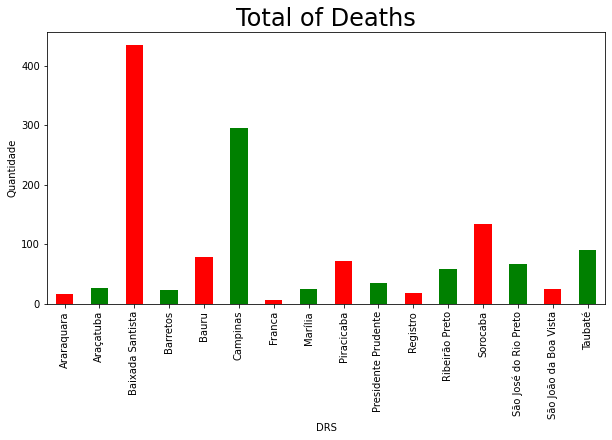

In [26]:
drs_graphic = drs_filter.groupby(['nome_drs'])['obitos_novos'].sum().plot(kind='bar', title='Total de óbitos', 
                                                        xlabel='DRS', ylabel='Quantidade', figsize=(10,5), color=['red','green'])
drs_graphic.set_title('Total of Deaths', size=24)

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [74]:
drs3_filter = df2[(df2['nome_drs'] == 'Campinas') | 
                 (df2['nome_drs'] == 'Piracicaba') | 
                 (df2['nome_drs'] == 'Sorocaba')]

drs3_filter = filtro_drs[filtro_drs['ano_mes'] == '2020-04']

Text(0, 0.5, 'DRS')

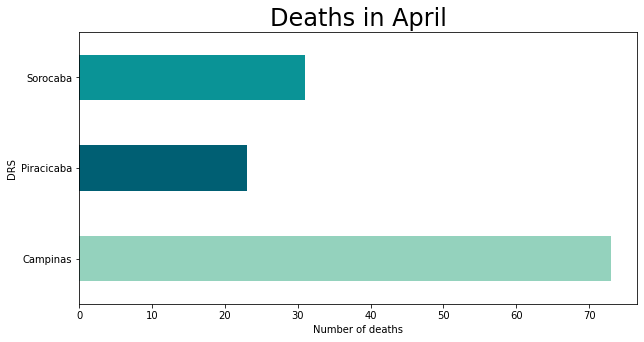

In [75]:
drs3_graphic = filtro_drs.groupby(['nome_drs'])['obitos_novos'].sum().plot(kind='barh', 
                                                        figsize=(10,5), color=['#94d2bd','#005f73', '#0a9396'])
drs3_graphic.set_title('Deaths in April', size=24)
drs3_graphic.set_xlabel('Number of deaths')
drs3_graphic.set_ylabel('DRS')

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

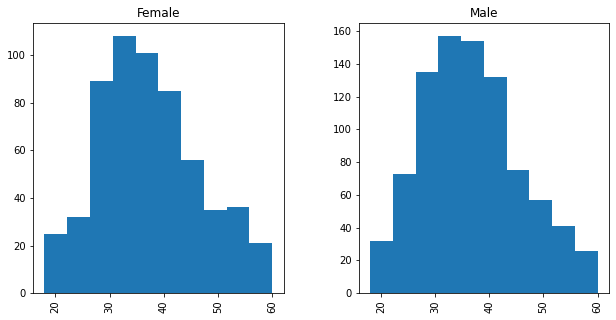

In [40]:
df1.hist(column='Age', by='Gender', figsize=(10,5))

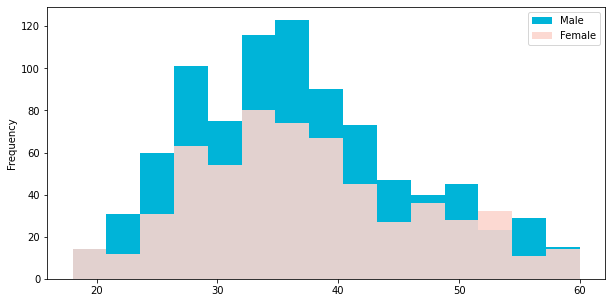

In [69]:
ax1 = df1[df1['Gender'] == 'Male'].plot(kind='hist', y='Age', bins=15, figsize=(10,5), label='Male', color='#00b4d8')
ax2 = df1[df1['Gender'] == 'Female'].plot(kind='hist', y='Age', bins=15, figsize=(10,5), color='#fcd5ce', label='Female', alpha=0.9, ax=ax1)

**b)** Faça agora um boxplot das idades, por gênero.

Age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

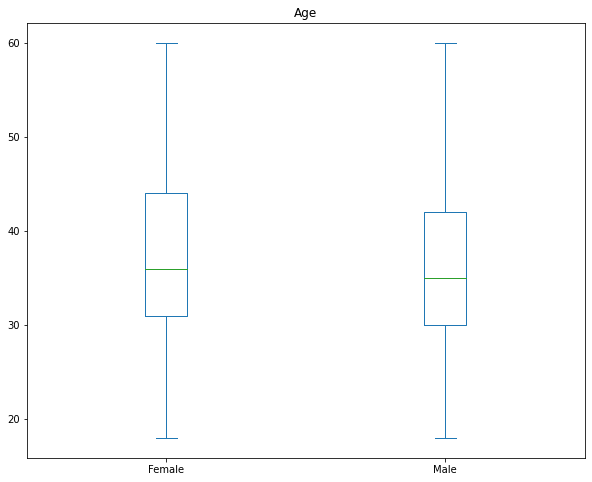

In [73]:
df1.plot(kind='box', column='Age', by='Gender', figsize=(10,8))